In [39]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay 

import torch
from torch import nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [40]:
# Завантаження даних 
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
df = pd.read_csv("cardio_train.csv", sep=';')
print("Shape:", df.shape)
df.info()
display(df.describe().T)

Shape: (70000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [41]:
# Дивимося скільки екземплярів кожного класу
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

df["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [42]:
# Видаляємо колонку id - вона не потрібна
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df = df.drop('id', axis=1)

# колонка age задана в днях, перетворюємо в роки
df["age"] = (df["age"] / 365).astype(int)

df.info()
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.840671,6.766774,29.0,48.0,53.0,58.0,64.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [43]:
# Ділимо дані на вхід X - вихід у
input_factors = [
    'age', 
    'gender', 
    'height', 
    'weight', 
    'ap_hi', 
    'ap_lo',
    'cholesterol', 
    'gluc', 
    'smoke', 
    'alco', 
    'active'
]

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html
X = df[input_factors].to_numpy()
y = df['cardio'].to_numpy()

In [44]:
# Розділяємо на навчальну і тестову вибірки
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train.shape

(56000, 11)

In [45]:
# нормуємо вхідні фактори, бо вони суттєво відрізняються за масштабом
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.91083466, -0.73377059, -1.26391038, ..., -0.31207962,
        -0.24087574,  0.49410558],
       [-1.1561044 ,  1.36282377, -0.28679781, ..., -0.31207962,
        -0.24087574, -2.02385896],
       [ 0.61555765,  1.36282377,  1.17887105, ..., -0.31207962,
        -0.24087574,  0.49410558],
       ...,
       [ 1.64902718, -0.73377059,  0.56817569, ..., -0.31207962,
        -0.24087574,  0.49410558],
       [-0.56555038, -0.73377059,  0.32389755, ..., -0.31207962,
        -0.24087574, -2.02385896],
       [-1.74665841,  1.36282377,  1.54528826, ..., -0.31207962,
        -0.24087574,  0.49410558]], shape=(56000, 11))

In [46]:
# Перетворюємо дані в Torch тензори
# https://docs.pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test

print(X_train.dtype)
print(X_train.shape)

print(y_train.dtype)
print(y_test.shape)

torch.float32
torch.Size([56000, 11])
torch.int64
(14000,)


In [47]:
# Створюємо мережу
# https://docs.pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

class MLP(nn.Module):
    def __init__(self, input_factors):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_factors, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.net(x)

model = MLP(X_train.shape[1])
print(model)

MLP(
  (net): Sequential(
    (0): Linear(in_features=11, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [48]:
# Визначення функції втрат і оптимізатора
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

# Навчання
epochs = 500
losses = []
min_loss = None
best_model = None

for epoch in range(epochs):
    # Compute prediction and loss
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    # дивимося чи ця модель краща за попередню 
    # if not min_loss or (loss < min_loss):
    #     min_loss = loss
    #     best_model = model.state_dict()

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
    losses.append(loss.item())
    

Epoch 1/500, Loss: 0.6912
Epoch 2/500, Loss: 0.6862
Epoch 3/500, Loss: 0.6817
Epoch 4/500, Loss: 0.6776
Epoch 5/500, Loss: 0.6737
Epoch 6/500, Loss: 0.6700
Epoch 7/500, Loss: 0.6664
Epoch 8/500, Loss: 0.6628
Epoch 9/500, Loss: 0.6593
Epoch 10/500, Loss: 0.6558
Epoch 11/500, Loss: 0.6524
Epoch 12/500, Loss: 0.6491
Epoch 13/500, Loss: 0.6459
Epoch 14/500, Loss: 0.6429
Epoch 15/500, Loss: 0.6401
Epoch 16/500, Loss: 0.6376
Epoch 17/500, Loss: 0.6354
Epoch 18/500, Loss: 0.6334
Epoch 19/500, Loss: 0.6318
Epoch 20/500, Loss: 0.6305
Epoch 21/500, Loss: 0.6295
Epoch 22/500, Loss: 0.6287
Epoch 23/500, Loss: 0.6281
Epoch 24/500, Loss: 0.6276
Epoch 25/500, Loss: 0.6271
Epoch 26/500, Loss: 0.6266
Epoch 27/500, Loss: 0.6261
Epoch 28/500, Loss: 0.6255
Epoch 29/500, Loss: 0.6248
Epoch 30/500, Loss: 0.6241
Epoch 31/500, Loss: 0.6233
Epoch 32/500, Loss: 0.6225
Epoch 33/500, Loss: 0.6217
Epoch 34/500, Loss: 0.6209
Epoch 35/500, Loss: 0.6202
Epoch 36/500, Loss: 0.6196
Epoch 37/500, Loss: 0.6190
Epoch 38/5

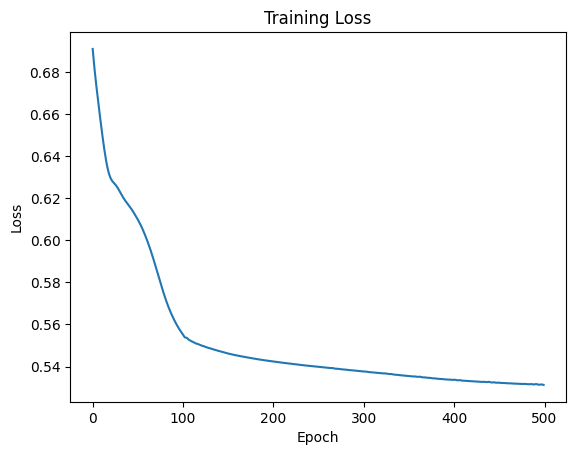

In [49]:
# Графік навчання
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [50]:
# model = MLP(X_train.shape[1])
# model.load_state_dict(best_model)

In [51]:
# Оцінка точності - пропускаємо через навчену модель тестову вибірку
with torch.no_grad():
    y_pred = model(X_test)
    pred_class = torch.argmax(y_pred, dim=1)

y_true = y_test

print("Accuracy:", accuracy_score(y_true, pred_class))
print(classification_report(y_true, pred_class, digits=4))

cm = confusion_matrix(y_true, pred_class)

print(y_pred)

Accuracy: 0.7386428571428572
              precision    recall  f1-score   support

           0     0.7208    0.7775    0.7481      6988
           1     0.7594    0.6999    0.7285      7012

    accuracy                         0.7386     14000
   macro avg     0.7401    0.7387    0.7383     14000
weighted avg     0.7402    0.7386    0.7383     14000

tensor([[-0.4297,  1.0987],
        [-0.7890,  1.0161],
        [-0.0275,  0.5691],
        ...,
        [ 0.2867,  0.3438],
        [-0.0068,  0.7329],
        [-0.2428,  0.9515]])


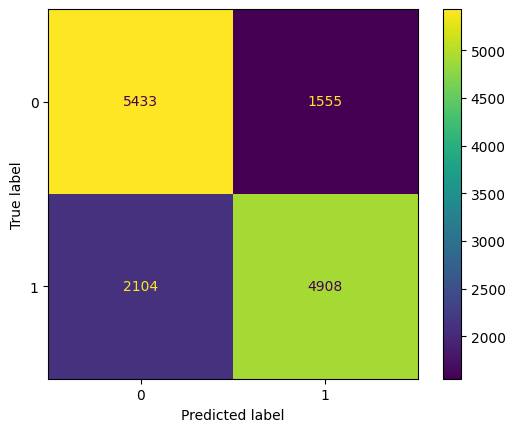

In [52]:
# Візуалізація Confusion Matrix - для гарного вигляду
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

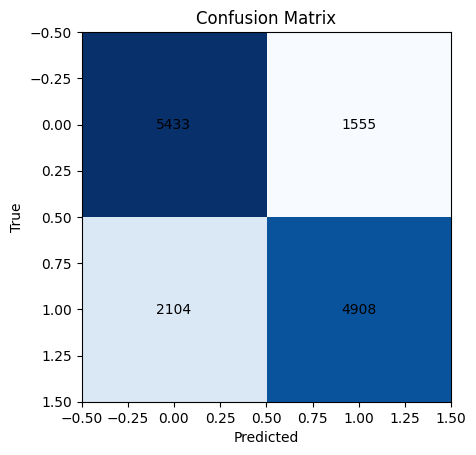

In [53]:
# Візуалізація Confusion Matrix - для гарного вигляду
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, val, ha='center', va='center', color='black')
plt.show()

In [54]:
# Збереження моделі і об'єкту масштабування
import joblib
torch.save(model.state_dict(), "cardio_quickstart_mlp.pth")

joblib.dump(scaler, "scaler.pkl")
print("Модель та scaler збережено.")

Модель та scaler збережено.
